In [14]:
from SC_VCG_multiprocess import *
import matplotlib.pyplot as plt
agent_num,bid_num,cycle = 80,3,20
platform_real_ratio = [0.8,1.0,1.2]
fig_num=4.2
#绘图SCE-VCG 平台报价分别为0.8,1.0,1.2时，agent=40,bid=3,cycle=20时的对比图

In [15]:
# 读取数据
#读数据的函数增加了一个参数，需要后续修改
# mean_SC_VCG = read_pkl('SC-VCG',agent_num,bid_num,platform_real_ratio[0])
N = len(platform_real_ratio)
mean_SCE_VCG = [[]for i in range(N)]
for i in range(N):
    mean_SCE_VCG[i] = read_pkl('SCE-VCG',agent_num,bid_num,platform_real_ratio[i])
t = [[]for i in range(N)]

SCE_VCG_W_N = [[]for i in range(N)]
SCE_VCG_profits = [[]for i in range(N)]
SCE_AP = [[]for i in range(N)]
SCE_Exchange = [[]for i in range(N)]
SCE_PExchange = [[]for i in range(N)]

for i in range(N):
    for key in mean_SCE_VCG[i]:
        t[i].append(key)               # t = [key for key in SC_VCG]   #横坐标
#         value1 = mean_SC_VCG[i][key]
        value2 = mean_SCE_VCG[i][key] 
#         SC_VCG_W_N.append(round(value1[0],2))
#         SC_VCG_profits.append(round(value1[1],2))
#         SC_AP.append(round(value1[0]-value1[1],2))
#         SC_Exchange.append(round(value1[3],2))

        SCE_VCG_W_N[i].append(round(value2[0],2))
        SCE_VCG_profits[i].append(round(value2[1],2))
        SCE_AP[i].append(round(value2[0]-value2[1],2))
        SCE_Exchange[i].append(round(value2[3],2))
        SCE_PExchange[i].append(round(value2[5],2))

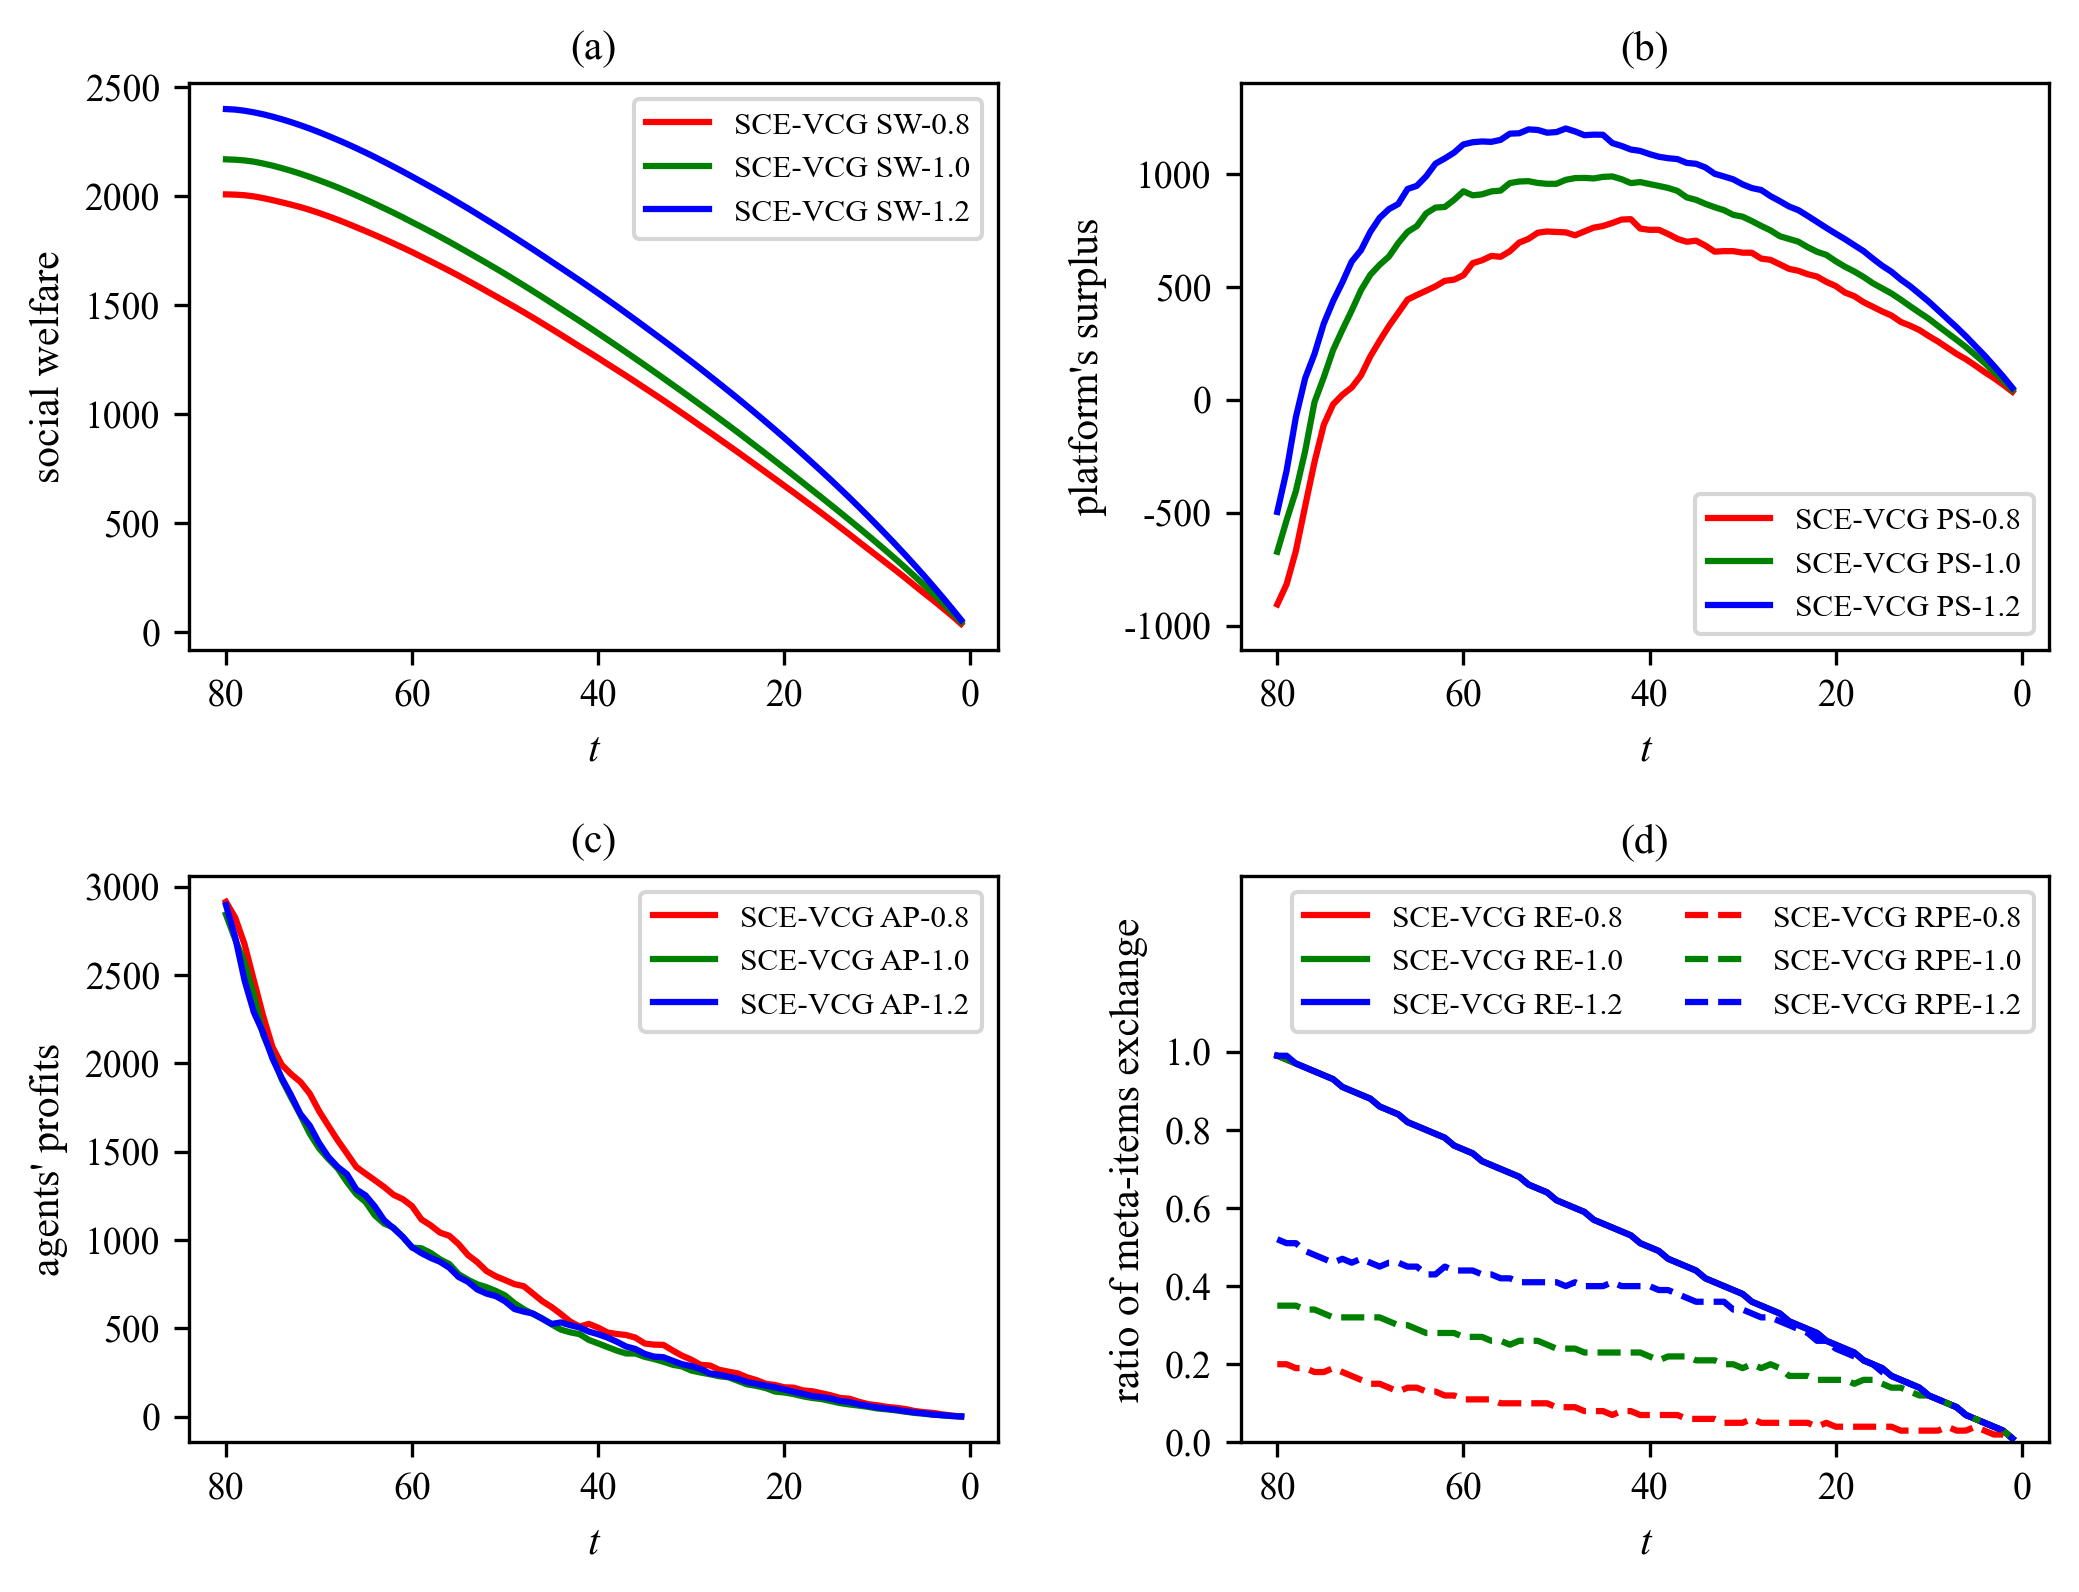

In [22]:
# 画图
plt.figure('Fig4.1', figsize = (8, 6),dpi = 300)
line_style = ['-', '--']
# colors = ["#d5695d","#5d8ca8","#65a479","#a564c9"]
#每个子图的内容分别是上述的不同性质

plt.subplot(221)
y_max = max(SCE_VCG_W_N[0],SCE_VCG_W_N[1],SCE_VCG_W_N[2])   
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t[0], SCE_VCG_W_N[0], c='red', label="SCE-VCG SW-0.8", linestyle=line_style[0])
plt.plot(t[1], SCE_VCG_W_N[1], c='green', label='SCE-VCG SW-1.0', linestyle=line_style[0])
plt.plot(t[2], SCE_VCG_W_N[2], c='blue', label='SCE-VCG SW-1.2', linestyle=line_style[0])
plt.grid(False)
# plt.xlim(20,80)
# plt.ylim(1000,max(y_max)+200)
plt.legend(loc='upper right',prop={'family' : 'Times New Roman','size':7.5},ncol = 1)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("social welfare", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(a)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(222)          
y_min = min(min(SCE_VCG_profits[0]),min(SCE_VCG_profits[1]),min(SCE_VCG_profits[2])) 
y_max = max(max(SCE_VCG_profits[0]),max(SCE_VCG_profits[1]),max(SCE_VCG_profits[2])) 
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t[0], SCE_VCG_profits[0], c='red', label="SCE-VCG PS-0.8", linestyle=line_style[0])
plt.plot(t[1], SCE_VCG_profits[1], c='green', label='SCE-VCG PS-1.0', linestyle=line_style[0])
plt.plot(t[2], SCE_VCG_profits[2], c='blue', label='SCE-VCG PS-1.2', linestyle=line_style[0])
plt.ylim(y_min-200,y_max+200)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':7.5},ncol = 1)
plt.grid(False)
# plt.xlim(20,80)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("platform's surplus", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(b)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(223)   
y_max = max(max(SCE_AP[0]),max(SCE_AP[1]),max(SCE_AP[2])) 
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t[0], SCE_AP[0], c='red', label="SCE-VCG AP-0.8", linestyle=line_style[0])
plt.plot(t[1], SCE_AP[1], c='green', label='SCE-VCG AP-1.0', linestyle=line_style[0])
plt.plot(t[2], SCE_AP[2], c='blue', label='SCE-VCG AP-1.2', linestyle=line_style[0])
plt.grid(False)
# plt.xlim(20,80)
# plt.ylim(0,y_max+200)
plt.yticks([0,500,1000,1500,2000,2500,3000])
plt.legend(loc='upper right',prop={'family' : 'Times New Roman','size':7.5},ncol = 1)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("agents' profits", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(c)",fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(224)  
y_max = 1.45  
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t[0], SCE_Exchange[0], c='red', label="SCE-VCG RE-0.8", linestyle=line_style[0])
plt.plot(t[1], SCE_Exchange[1], c='green', label='SCE-VCG RE-1.0', linestyle=line_style[0])
plt.plot(t[2], SCE_Exchange[2], c='blue', label='SCE-VCG RE-1.2', linestyle=line_style[0])
plt.plot(t[0], SCE_PExchange[0], c='red', label="SCE-VCG RPE-0.8", linestyle=line_style[1])
plt.plot(t[1], SCE_PExchange[1], c='green', label='SCE-VCG RPE-1.0', linestyle=line_style[1])
plt.plot(t[2], SCE_PExchange[2], c='blue', label='SCE-VCG RPE-1.2', linestyle=line_style[1])
# plt.xlim(20,80)
plt.ylim(0,y_max)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':7.5},ncol = 2)
plt.grid(False)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("ratio of meta-items exchange", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(d)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# plt.autofmt_xdate()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
path = './pic/'
pic_name = path + str(agent_num) + '_' + str(bid_num) + 'Fig'+str(fig_num) + '.png'
plt.savefig(pic_name,dpi = 300,bbox_inches ="tight",transparent = True)
plt.show()